In [1]:
import os 
os.getcwd()
os.chdir('../')

In [2]:
from src.methods.bose import bose
# Timing
from timeit import default_timer
from datetime import datetime as dt

/home/vinh/anaconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from pm4py import read_xes


In [4]:
log = read_xes('data/sudden.xes')

parsing log, completed traces :: 100%|████| 1300/1300 [00:00<00:00, 2422.79it/s]


In [5]:
from src.utils.helpers import _getActivityNames, _getActivityNames_LogList

In [9]:
# import numpy as np
# def extractTraces(log: EventLog, activityName_key:str=xes.DEFAULT_NAME_KEY)-> np.ndarray:
#     out = np.empty(len(log), dtype=object)
#     for index, case in enumerate(log):
#         out[index] = tuple(evt[activityName_key] for evt in case)
#     return out

In [6]:
WINDOW_SIZE = 200
MEASURE_WINDOW = None

In [7]:
start_j = default_timer()
p_j = bose.detectChange_JMeasure_KS(log,WINDOW_SIZE, MEASURE_WINDOW)
calc_duration_j = default_timer() - start_j
start_wc = default_timer()
p_wc = bose.detectChange_WC_KS(log,WINDOW_SIZE, MEASURE_WINDOW)
calc_duration_wc = default_timer() - start_wc

Calculating J P-Values for Bose, activity pairs complete ::  72%|▋| 87/121 [00:4/home/vinh/anaconda3/envs/myenv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)
Calculating J P-Values for Bose, activity pairs complete :: 100%|█| 121/121 [01:
Calculating WC P-Values for Bose, activity pairs complete :: 100%|█| 121/121 [01


In [8]:
cp_j = bose.visualInspection(p_j, WINDOW_SIZE)
cp_wc = bose.visualInspection(p_wc, WINDOW_SIZE)

print(f"J Measure Extraction detected {cp_j}.")
print(f"Window Count Extraction detected {cp_wc}.")

J Measure Extraction detected [np.int64(502)].
Window Count Extraction detected [np.int64(499)].


In [9]:
import matplotlib.pyplot as plt

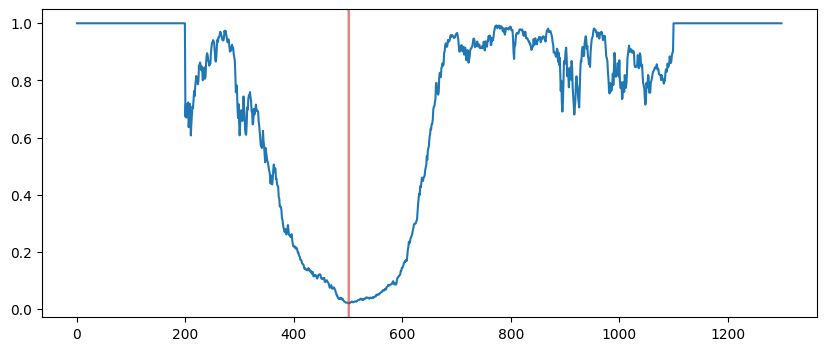

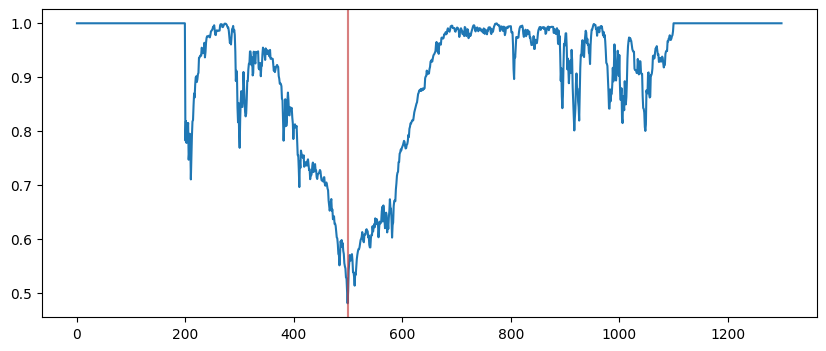

In [11]:

TRUE_CHANGEPOINTS = [500]
def plotPvals(sig, cp, known_cp):
    fig = plt.figure(figsize=(10,4))
    plt.plot(sig)
    for c in cp:
        plt.axvline(x=c, color="red", alpha=0.5)
    for c in known_cp:
        plt.axvline(x=c, color="grey", alpha=0.3)
    plt.show()

plotPvals(p_j,cp_j, TRUE_CHANGEPOINTS)
plotPvals(p_wc,cp_wc, TRUE_CHANGEPOINTS)